<a href="https://colab.research.google.com/github/jamesokechukwu/Data-Specialist/blob/master/James_Stage_E_Tag_along_codes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("https://github.com/HamoyeHQ/HDSC-Time-series-analysis-and-forecast/files/7768846/Time_series_analysis_and_forecast_DATASET.csv")
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [2]:
df.isnull().values.any() #checking for missing values

False

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FullDate   92016 non-null  object 
 1   Tmax       92016 non-null  float64
 2   SysLoad    92016 non-null  float64
 3   GasPrice   92016 non-null  float64
 4   ElecPrice  92016 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.5+ MB


In [4]:
#Converting column to datetime
df['FullDate'] = pd.to_datetime(df['FullDate'])
df.set_index('FullDate', inplace = True)

In [5]:
#Resampling to daily data
df_daily = df.resample('D').sum() 
df_daily

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01,379.2,41565.38000,88.5600,2751.700
2010-09-02,369.6,38898.99000,88.5600,570.810
2010-09-03,439.2,41665.76000,106.8000,504.975
2010-09-04,328.8,35638.08500,81.3600,502.275
2010-09-05,357.6,35611.41000,106.8000,500.555
...,...,...,...,...
2021-02-24,537.6,-1525.49745,134.4000,634.770
2021-02-25,518.4,4539.07855,130.5048,577.515
2021-02-26,547.2,9517.02430,130.1808,1445.495


Text(0, 0.5, 'ElecPrice_Sampled')

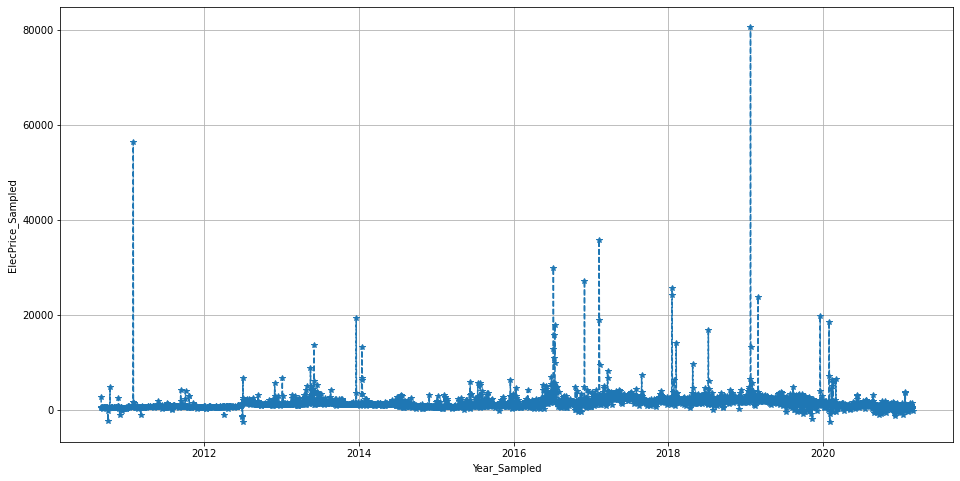

In [6]:
#Question 11 plot ElecPrice over Time
plt.figure(figsize=(16,8))
plt.plot(df_daily.index, df_daily.ElecPrice, '--', marker='*')
plt.grid()
plt.xlabel('Year_Sampled')
plt.ylabel('ElecPrice_Sampled')

Question 12. P value of Sysload and GasPrice into 6 d.p

In [7]:
from statsmodels.tsa.stattools import adfuller
adf1 = adfuller(df_daily['SysLoad'])
print(f'P-value of SysLoad: {round(adf1[1], 6)}')

P-value of SysLoad: 0.004254


In [8]:
adf2 = adfuller(df_daily['GasPrice'])
print(f'P-value of GasPrice: {round(adf2[1], 6)}')

P-value of GasPrice: 0.045027


Question 13 Critical values of Gas Price and ElecPrice using ADF for 10% and 5%

In [9]:
print('Critical values of GasPrice:')
for k, v in adf2[4].items():
  print(f' {k} : {round(v, 4)}')

Critical values of GasPrice:
 1% : -3.4321
 5% : -2.8623
 10% : -2.5672


In [10]:
adf3 = adfuller(df_daily['ElecPrice'])
print('Critical values of ElecPrice:')
for k, v in adf3[4].items():
  print(f' {k} : {round(v, 4)}')

Critical values of ElecPrice:
 1% : -3.4321
 5% : -2.8623
 10% : -2.5672


In [11]:
pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
from prophet import Prophet
df = df_daily.reset_index().rename(columns = {"FullDate" : "ds", "ElecPrice" : "y"})
df.head()

,ds,Tmax,SysLoad,GasPrice,y
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [13]:
# Splitting data into Train and test
test_size = (len(df)-2757)

train_data = df[: - test_size]
test_data = df[-test_size:]

In [14]:
test_data.head()

,ds,Tmax,SysLoad,GasPrice,y
2757,2018-03-20,540.0,7696.91130,201.5880,1833.00
2758,2018-03-21,571.2,4658.05865,203.2560,1730.49
2759,2018-03-22,722.4,19161.78525,203.2560,2260.55
2760,2018-03-23,811.2,18090.43435,198.6456,2138.76
2761,2018-03-24,832.8,3763.53865,180.2160,1721.70


In [15]:
train_data.tail()

,ds,Tmax,SysLoad,GasPrice,y
2752,2018-03-15,609.6,27139.02585,220.6272,2717.340
2753,2018-03-16,648.0,19710.46400,216.9600,2277.335
2754,2018-03-17,724.8,1079.34705,209.0400,1718.385
2755,2018-03-18,508.8,-4102.43795,203.9880,1088.015
2756,2018-03-19,561.6,8731.39945,199.2720,1998.305


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3834 entries, 0 to 3833
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   ds        3834 non-null   datetime64[ns]
 1   Tmax      3834 non-null   float64       
 2   SysLoad   3834 non-null   float64       
 3   GasPrice  3834 non-null   float64       
 4   y         3834 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 149.9 KB


In [17]:
model = Prophet()
model.fit(train_data)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsnh8ev_q/45nxmfs8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsnh8ev_q/dw1z9dxg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91904', 'data', 'file=/tmp/tmpsnh8ev_q/45nxmfs8.json', 'init=/tmp/tmpsnh8ev_q/dw1z9dxg.json', 'output', 'file=/tmp/tmpsnh8ev_q/prophet_modelex7nxpyr/prophet_model-20221014005010.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:50:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:50:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [18]:
# making predictions
future = model.make_future_dataframe(periods=len(test_data), freq = 'D')

In [19]:
future.head()

,ds
0,2010-09-01
1,2010-09-02
2,2010-09-03
3,2010-09-04
4,2010-09-05


In [20]:
forecast = model.predict(future)

In [21]:
print(len(forecast))
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

3834
          ds         yhat   yhat_lower   yhat_upper
0 2010-09-01   979.747638 -1299.000662  3373.831650
1 2010-09-02  1060.137609 -1352.552446  3379.072198
2 2010-09-03   835.203171 -1577.284309  3257.781109
3 2010-09-04   494.982534 -1778.653730  2781.346624
4 2010-09-05   405.095483 -1803.745200  2664.447005


In [22]:
def mean_absolute_percentage_error(y_true, y_pred):
  return (np.mean(np.abs((y_true - y_pred) / y_true))) * 100
    
y_true = test_data['y'].values
y_pred = forecast['yhat'][-test_size:].values

mape = round(mean_absolute_percentage_error(y_true, y_pred), 2)
print(f'MAPE of Univariate model: {mape}')

MAPE of Univariate model: 539.22


In [23]:
# RMSE of univariate model in 2 decimal places
from sklearn.metrics import mean_squared_error
rmse = round(np.sqrt(mean_squared_error(y_true, y_pred)), 2)
print(f'RMSE of univariate model: {rmse}')

RMSE of univariate model: 3196.64


In [24]:
from prophet.plot import plot_components_plotly
plot_components_plotly(model, forecast)

Multivariate Analysis Using Prophet

In [25]:
multi_analy = df_daily.reset_index()[['FullDate','SysLoad','Tmax','GasPrice','ElecPrice']].rename({'FullDate':'ds', 'SysLoad':'add1', 'Tmax':'add2', 'GasPrice':'add3', 'ElecPrice':'y'}, axis=1)
multi_analy.head()

,ds,add1,add2,add3,y
0,2010-09-01,41565.380,379.2,88.56,2751.700
1,2010-09-02,38898.990,369.6,88.56,570.810
2,2010-09-03,41665.760,439.2,106.80,504.975
3,2010-09-04,35638.085,328.8,81.36,502.275
4,2010-09-05,35611.410,357.6,106.80,500.555


In [26]:
data_train = multi_analy[0:2757]
data_test = multi_analy[2757:]

In [27]:
model2 = Prophet()

In [28]:
model2.add_regressor('add1')
model2.add_regressor('add2')
model2.add_regressor('add3')

In [29]:
model2.fit(data_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsnh8ev_q/7l4cillk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsnh8ev_q/k1tj_7dn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67430', 'data', 'file=/tmp/tmpsnh8ev_q/7l4cillk.json', 'init=/tmp/tmpsnh8ev_q/k1tj_7dn.json', 'output', 'file=/tmp/tmpsnh8ev_q/prophet_modelnlik1fat/prophet_model-20221014005012.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:50:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:50:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [30]:
future2 = model2.make_future_dataframe(periods=len(data_test), freq='D')
future2.head()

,ds
0,2010-09-01
1,2010-09-02
2,2010-09-03
3,2010-09-04
4,2010-09-05


In [31]:
future2['add1'] = multi_analy['add1']
future2['add2'] = multi_analy['add2']
future2['add3'] = multi_analy['add3']
future2

,ds,add1,add2,add3
0,2010-09-01,41565.38000,379.2,88.5600
1,2010-09-02,38898.99000,369.6,88.5600
2,2010-09-03,41665.76000,439.2,106.8000
3,2010-09-04,35638.08500,328.8,81.3600
4,2010-09-05,35611.41000,357.6,106.8000
...,...,...,...,...
3829,2021-02-24,-1525.49745,537.6,134.4000
3830,2021-02-25,4539.07855,518.4,130.5048
3831,2021-02-26,9517.02430,547.2,130.1808
3832,2021-02-27,4932.88015,564.0,130.0800


In [32]:
forecast2 = model2.predict(future2)
print(forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

          ds         yhat   yhat_lower   yhat_upper
0 2010-09-01  1520.781475  -721.328893  3787.447644
1 2010-09-02  1472.400650  -866.537833  3663.039438
2 2010-09-03  1701.685867  -532.969254  4051.330767
3 2010-09-04   916.338987 -1374.892527  3143.118815
4 2010-09-05  1333.551140  -758.175234  3771.143574


In [33]:
y_true = data_test['y'].values
y_pred = forecast2['yhat'][2757:].values
mape = round(mean_absolute_percentage_error(y_true, y_pred), 2)
print(f'MAPE of Multivariate model: {mape}')

MAPE of Multivariate model: 232.43


In [34]:
rmse = round(np.sqrt(mean_squared_error(y_true, y_pred)), 2)
print(f'RMSE of Multivariate model: {rmse}')

RMSE of Multivariate model: 2708.17


In [35]:
plot_components_plotly(model2, forecast2)

In [36]:
#Dropping Tmax
data_train1 = data_train.drop(['add2'], axis=1)
data_train1.head()

,ds,add1,add3,y
0,2010-09-01,41565.380,88.56,2751.700
1,2010-09-02,38898.990,88.56,570.810
2,2010-09-03,41665.760,106.80,504.975
3,2010-09-04,35638.085,81.36,502.275
4,2010-09-05,35611.410,106.80,500.555


In [37]:
model3 = Prophet()

In [38]:
model3.add_regressor('add1')
model3.add_regressor('add3')

In [39]:
model3.fit(data_train1)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsnh8ev_q/zw1y3svd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsnh8ev_q/e9rvt1n7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85932', 'data', 'file=/tmp/tmpsnh8ev_q/zw1y3svd.json', 'init=/tmp/tmpsnh8ev_q/e9rvt1n7.json', 'output', 'file=/tmp/tmpsnh8ev_q/prophet_modelm3wn3tlx/prophet_model-20221014005014.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:50:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:50:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [40]:
future3 = model3.make_future_dataframe(periods=len(data_test), freq='D')

In [41]:
multivar_analy = df_daily.reset_index()[['FullDate','SysLoad','GasPrice','ElecPrice']].rename({'FullDate':'ds', 'SysLoad':'add1', 'GasPrice':'add3', 'ElecPrice':'y'}, axis=1)
multivar_analy.head()

,ds,add1,add3,y
0,2010-09-01,41565.380,88.56,2751.700
1,2010-09-02,38898.990,88.56,570.810
2,2010-09-03,41665.760,106.80,504.975
3,2010-09-04,35638.085,81.36,502.275
4,2010-09-05,35611.410,106.80,500.555


In [42]:
future3['add1'] = multivar_analy['add1']
future3['add3'] = multivar_analy['add3']
future3

,ds,add1,add3
0,2010-09-01,41565.38000,88.5600
1,2010-09-02,38898.99000,88.5600
2,2010-09-03,41665.76000,106.8000
3,2010-09-04,35638.08500,81.3600
4,2010-09-05,35611.41000,106.8000
...,...,...,...
3829,2021-02-24,-1525.49745,134.4000
3830,2021-02-25,4539.07855,130.5048
3831,2021-02-26,9517.02430,130.1808
3832,2021-02-27,4932.88015,130.0800


In [43]:
forecast3 = model3.predict(future3)

In [44]:
y_true = data_test['y'].values
y_pred = forecast3['yhat'][2757:].values

In [45]:
mape = round(mean_absolute_percentage_error(y_true, y_pred), 2)
print(f'MAPE of Multivariate model  without Tmax: {mape}')

MAPE of Multivariate model  without Tmax: 232.38
